<a href="https://colab.research.google.com/github/Denilza/Cientista-de-Dados/blob/main/Exerc%C3%ADcio_Pr%C3%A1tico_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown # Install gdown if you haven't already
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import gdown

# Get the Google Drive file ID from the URL
url = 'https://drive.google.com/file/d/1zodNe86FzqWeyf069w9XIxg6UTbDym7y/view?usp=drive_link'
file_id = url.split('/')[-2] # Extract the ID

# Download the file to your local environment
gdown.download(id=file_id, output='imoveis.csv', quiet=False) # Download the CSV file

# Now, read the downloaded CSV file
df_vendas = pd.read_csv('imoveis.csv')

Downloading...
From: https://drive.google.com/uc?id=1zodNe86FzqWeyf069w9XIxg6UTbDym7y
To: /content/imoveis.csv
100%|██████████| 475/475 [00:00<00:00, 1.15MB/s]


In [ ]:


# Get the Google Drive file ID from the URL
url = 'https://drive.google.com/file/d/1W2T0byq7dDf46FdWf9DRNxpVVr_wruqk/view?usp=drive_link'
file_id = url.split('/')[-2] # Extract the ID

# Download the file to your local environment
gdown.download(id=file_id, output='imoveis.csv', quiet=False) # Download the CSV file

# Now, read the downloaded CSV file
df_saude = pd.read_csv('imoveis.csv')

Downloading...
From: https://drive.google.com/uc?id=1W2T0byq7dDf46FdWf9DRNxpVVr_wruqk
To: /content/imoveis.csv
100%|██████████| 168/168 [00:00<00:00, 381kB/s]


In [ ]:
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


*   1. Carregar os dados de um arquivo CSV fornecido (saude.csv).
*   2. Criar um histograma da variável 'age' usando Matplotlib.
*   3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando
Seaborn.
*   4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.


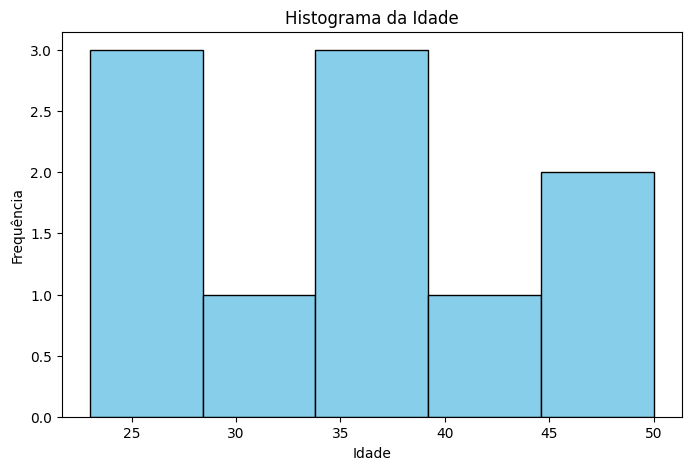

In [ ]:
age = df_saude['age']
# Criando o histograma da variável 'age'
plt.figure(figsize=(8, 5))
plt.hist(age, bins=5, color='skyblue', edgecolor='black')
plt.title("Histograma da Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

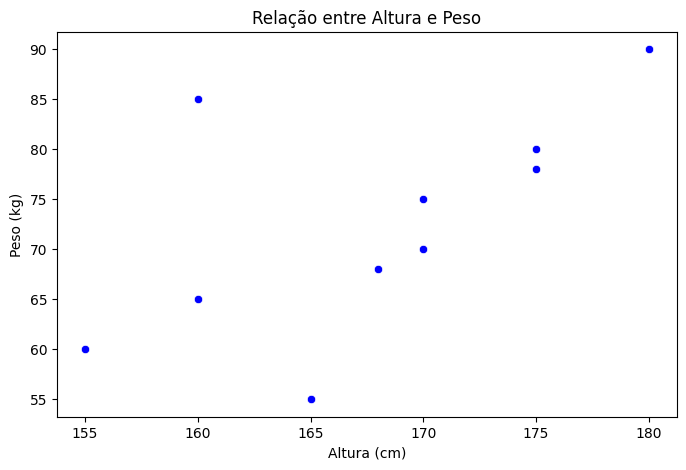

In [ ]:
df = pd.DataFrame(df_saude)

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='height', y='weight', color='blue')
plt.title("Relação entre Altura e Peso")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.show()

In [ ]:
import plotly.express as px
df = pd.DataFrame(df_saude)

# Contagem de indivíduos por gênero
gender_count = df_saude['gender'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']

# Criando o gráfico de barras interativo
fig = px.bar(gender_count, x='gender', y='count', title='Contagem de Indivíduos por Gênero', labels={'gender': 'Gênero', 'count': 'Contagem'})
fig.show()

**Desafio Prático 2: Séries Temporais**

*   1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).
*   2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib.
*   3. Criar um gráfico de decomposição sazonal usando Seaborn.
*   4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo
do tempo usando Plotly

In [ ]:
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


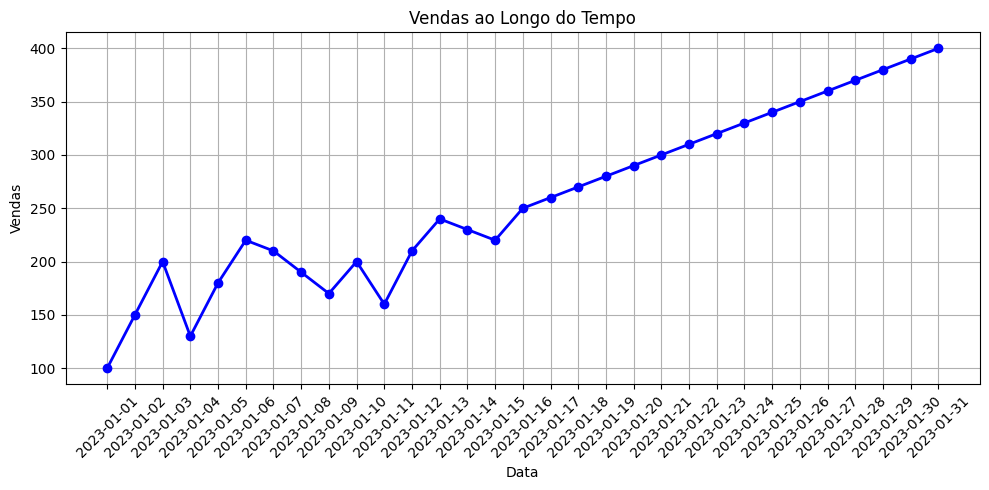

In [ ]:
df = pd.DataFrame(df_vendas)

# Convertendo a coluna 'date' para o formato datetime
df_vendas['date'] = pd.to_datetime(df['date'])

# Criando o gráfico de linhas
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['sales'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title("Vendas ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

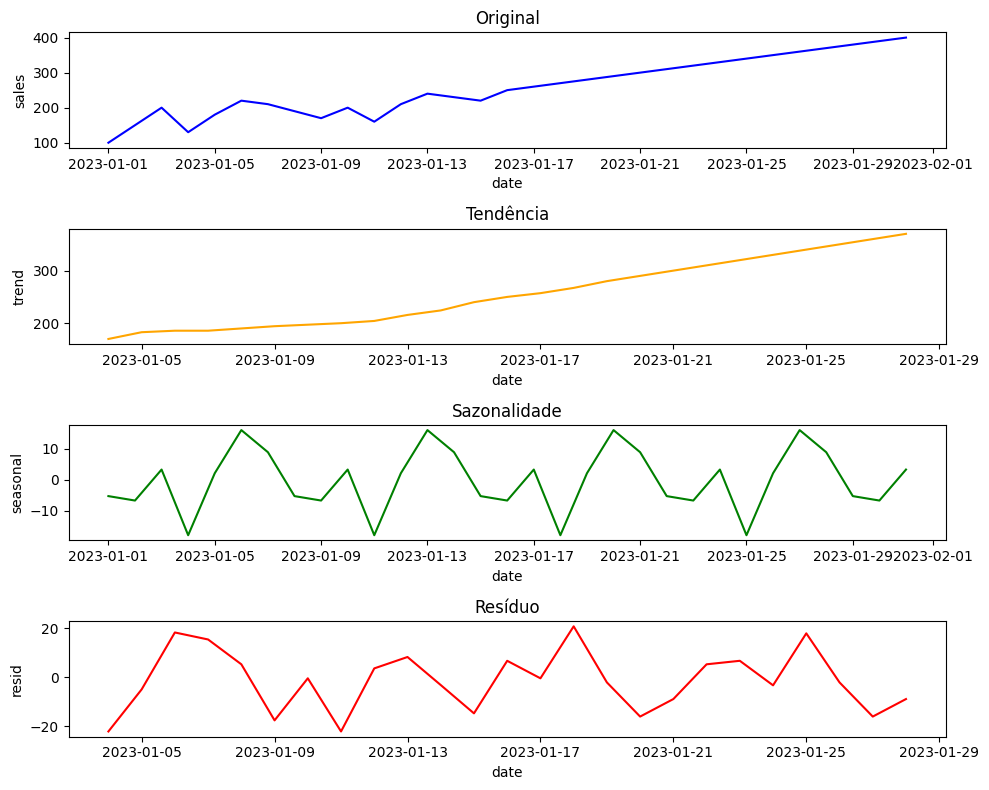

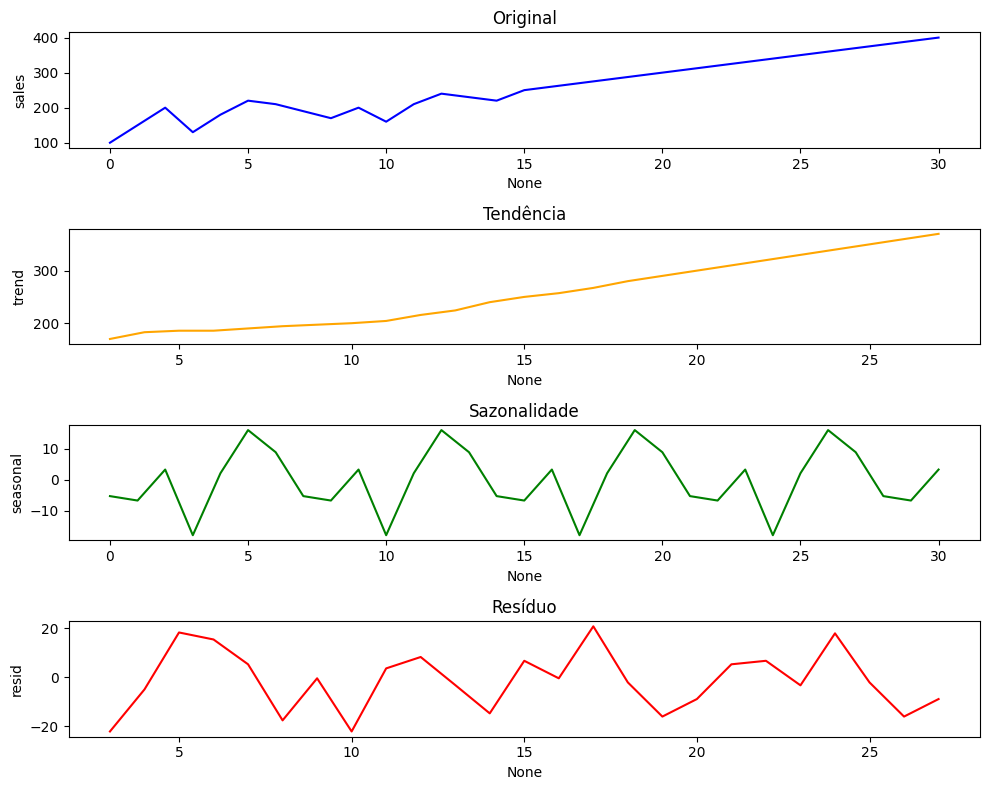

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_vendas = pd.DataFrame(df_vendas)
from statsmodels.tsa.seasonal import seasonal_decompose

df_vendas = pd.DataFrame(df_vendas)

# Convertendo a coluna 'date' para o formato datetime
df_vendas['date'] = pd.to_datetime(df_vendas['date'])
df_vendas.set_index('date', inplace=True)

# Decomposição sazonal
decomposition = seasonal_decompose(df_vendas['sales'], model='additive', period=7)

# Plotando a decomposição com Seaborn e Matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
sns.lineplot(x=df_vendas.index, y=df_vendas['sales'], color='blue')
plt.title('Original')

plt.subplot(4, 1, 2)
sns.lineplot(x=df_vendas.index, y=decomposition.trend, color='orange')
plt.title('Tendência')

plt.subplot(4, 1, 3)
sns.lineplot(x=df_vendas.index, y=decomposition.seasonal, color='green')
plt.title('Sazonalidade')

plt.subplot(4, 1, 4)
sns.lineplot(x=df_vendas.index, y=decomposition.resid, color='red')
plt.title('Resíduo')

plt.tight_layout()
plt.show()
# Decomposição sazonal
decomposition = seasonal_decompose(df_vendas['sales'], model='additive', period=7)

# Plotando a decomposição com Seaborn e Matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
sns.lineplot(x=df.index, y=df['sales'], color='blue')
plt.title('Original')

plt.subplot(4, 1, 2)
sns.lineplot(x=df.index, y=decomposition.trend, color='orange')
plt.title('Tendência')

plt.subplot(4, 1, 3)
sns.lineplot(x=df.index, y=decomposition.seasonal, color='green')
plt.title('Sazonalidade')

plt.subplot(4, 1, 4)
sns.lineplot(x=df.index, y=decomposition.resid, color='red')
plt.title('Resíduo')

plt.tight_layout()
plt.show()

In [ ]:
# Criando o gráfico de linhas interativo
fig = px.line(df_vendas, x=df_vendas.index, y='sales', title='Vendas ao Longo do Tempo')
fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Vendas',
    hovermode='x unified'
)

# Exibindo o gráfico
fig.show()